# Read, process, analyse environmental data (Bio-ORACLE platform)
Data are downloaded from: https://bio-oracle.org/

(Additional comparison with Tara in situ measurements, Carradec et al 2018, Delmont et al 2022)

#### Objectives:

Read, analyse environmental data (considered as environmental predictors in Species Distribution Modeling):

#### SST, SSS, PO4, NO3, PAR and chlorophyll

Compare environmental data from 2 databases:
- in situ measurements during Tara Oceans expedition
- Bio-Oracle data (global coverage)

In [1]:
# Modules
import numpy as np
import numpy.ma as ma

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Directories where the files are stored
rep='/home/alexandra/Documents/M2Alexandra/Data_ORACLE_test/'
rep_stations='/home/alexandra/Documents/M2Alexandra/Data_test/'

SST_file='Present.Surface.Temperature.Mean.asc'
SSS_file='Present.Surface.Salinity.Mean.asc'
NO3_file='Present.Surface.Nitrate.Mean.asc'
PO4_file='Present.Surface.Phosphate.Mean.asc'
PAR_file='Present.Surface.Par.Mean.asc.asc'

chl_file='Present.Surface.Chlorophyll.Mean.asc'
pp_file='Present.Surface.Primary.productivity.Mean.asc'
vel_file='Present.Surface.Current.Velocity.Mean.asc.BOv2_1.asc'

In [3]:
SST=np.loadtxt(rep+SST_file,skiprows=6)

In [4]:
SSS=np.loadtxt(rep+SSS_file,skiprows=6)
NO3=np.loadtxt(rep+NO3_file,skiprows=6)
PO4=np.loadtxt(rep+PO4_file,skiprows=6)
PAR=np.loadtxt(rep+PAR_file,skiprows=6)
chl=np.loadtxt(rep+chl_file,skiprows=6)

## 1. Plot maps of environmental predictors

### SST (temperature)

In [5]:
dim=np.shape(SST)
lon=np.linspace(-180,180,dim[1])
lat=np.linspace(90,-90,dim[0])
# create a basic rectangular grid of horizontal spatial resolution 0.08 degrees (longitude/latitude)
X,Y=np.meshgrid(lon,lat)

In [6]:
# Mask data on continents
SST_masked=ma.masked_equal(SST,-9999)
# Compute a zonal (longitudinal) mean
SST_zonmean=np.nanmean(SST_masked,axis=1)
np.shape(SST_zonmean)

(2160,)

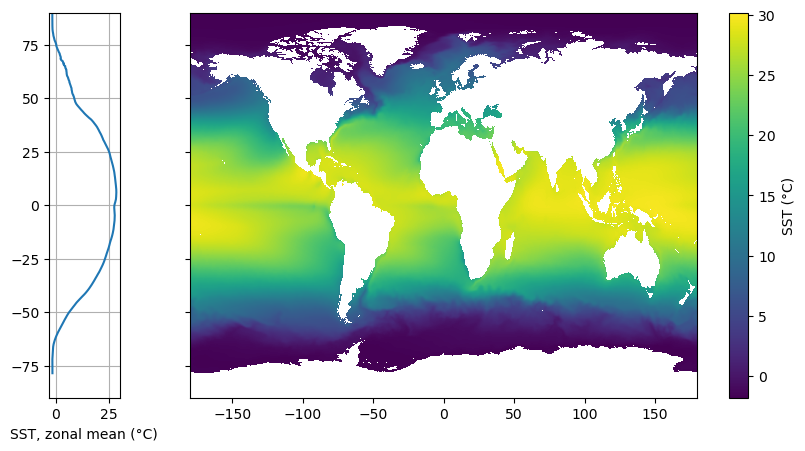

In [7]:
fig1,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
im=ax[1].pcolormesh(X,Y,SST_masked,cmap='viridis',vmin=np.min(SST_masked),vmax=np.max(SST_masked))
ax[0].plot(SST_zonmean,lat)
ax[0].grid()
ax[0].set_xlabel("SST, zonal mean (°C)")
plt.colorbar(im,label='SST (°C)')
plt.show()

### The same process is applied to all environmental predictors
### SSS and NO3

In [8]:
SSS_masked=ma.masked_equal(SSS,-9999)
NO3_masked=ma.masked_equal(NO3,-9999)

In [9]:
SSS_zonmean=np.nanmean(SSS_masked,axis=1)
NO3_zonmean=np.nanmean(NO3_masked,axis=1)

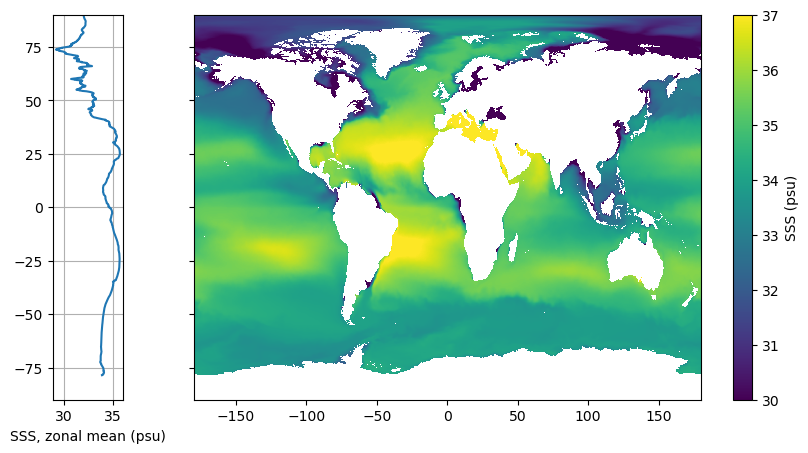

In [10]:
fig2,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
im=ax[1].pcolormesh(X,Y,SSS_masked,cmap='viridis',vmin=30,vmax=37)
ax[0].plot(SSS_zonmean,lat)
ax[0].grid()
ax[0].set_xlabel("SSS, zonal mean (psu)")
plt.colorbar(im,label='SSS (psu)')
plt.show()

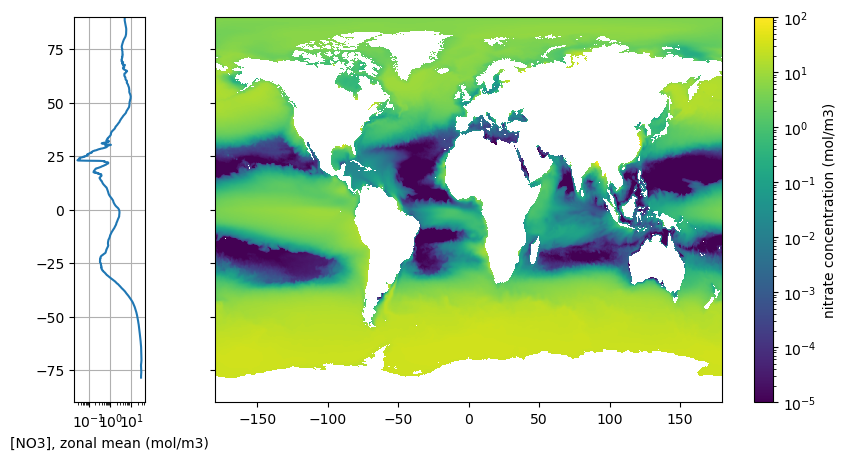

In [11]:
fig3,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
ax[0].plot(NO3_zonmean,lat)
ax[0].set_xscale('log')
ax[0].grid()
ax[0].set_xticks([1e-1,1,1e1])
ax[0].set_xlabel("[NO3], zonal mean (mol/m3)")
im=ax[1].pcolormesh(X,Y,NO3_masked,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1e-5,vmax=1e2))
plt.colorbar(im,label='nitrate concentration (mol/m3)')
plt.show()

### Photosynthetic Available Radiation et Phosphates

In [12]:
PAR_masked=ma.masked_equal(PAR,-9999)
PO4_masked=ma.masked_equal(PO4,-9999)
PO4_zonmean=np.nanmean(PO4_masked,axis=1)
PAR_zonmean=np.nanmean(PAR_masked,axis=1)

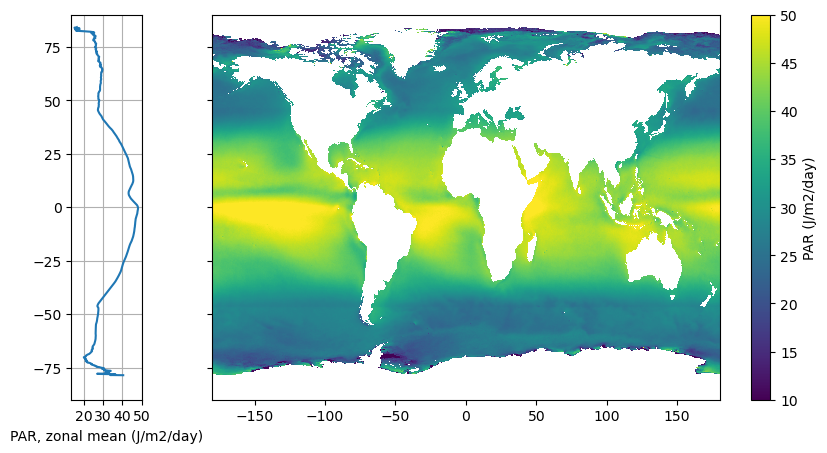

In [13]:
fig4,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
im=ax[1].pcolormesh(X,Y,PAR_masked,cmap='viridis',vmin=10,vmax=50)
ax[0].plot(PAR_zonmean,lat)
ax[0].grid()
ax[0].set_xticks([20,30,40,50])
ax[0].set_xlabel("PAR, zonal mean (J/m2/day)")
plt.colorbar(im,label='PAR (J/m2/day)')
plt.show()


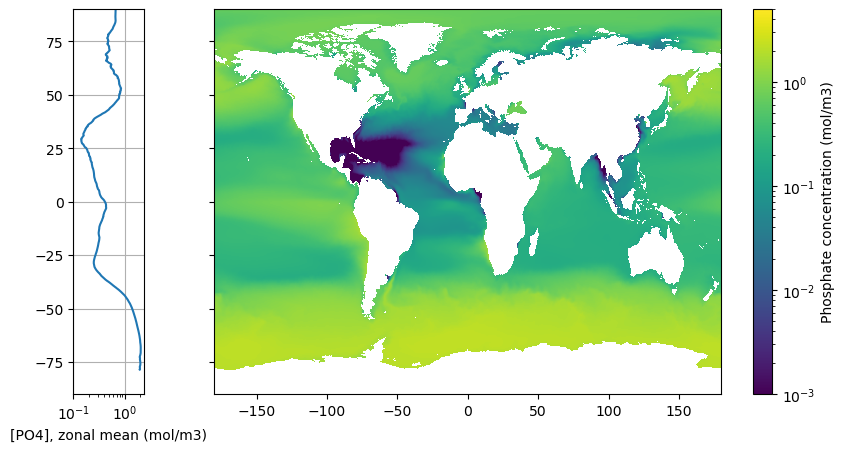

In [14]:
fig5,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
ax[0].plot(PO4_zonmean,lat)
ax[0].set_xscale('log')
ax[0].set_xticks([0.1,1])
ax[0].grid()
ax[0].set_xlabel('[PO4], zonal mean (mol/m3)')
im=ax[1].pcolormesh(X,Y,PO4_masked,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1e-3,vmax=5))
plt.colorbar(im,label='Phosphate concentration (mol/m3)')
plt.show()

### Chlorophyll

In [15]:
chl_masked=ma.masked_equal(chl,-9999)
chl_zonmean=np.nanmean(chl_masked,axis=1)

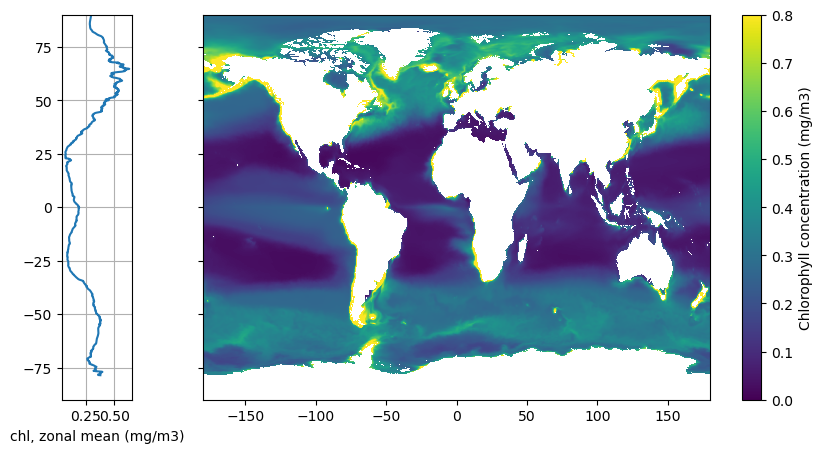

In [16]:
fig6,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,9]},sharey=True,figsize=(10,5))
im=ax[1].pcolormesh(X,Y,chl_masked,cmap='viridis',vmin=0,vmax=0.8)
ax[0].plot(chl_zonmean,lat)
ax[0].grid()
ax[0].set_xlabel("chl, zonal mean (mg/m3)")
plt.colorbar(im,label='Chlorophyll concentration (mg/m3)')
plt.show()

## 2. Compute correlogram between environmental predictors

In [17]:

# Reshape les variables environnementales sous forme de vecteurs, pour calculer la corrélation point de grille par point de grille
sst_reshape=np.reshape(SST_masked,dim[0]*dim[1])
sss_reshape=np.reshape(SSS_masked,dim[0]*dim[1])
no3_reshape=np.reshape(NO3_masked,dim[0]*dim[1])
po4_reshape=np.reshape(PO4_masked,dim[0]*dim[1])
par_reshape=np.reshape(PAR_masked,dim[0]*dim[1])
chl_reshape=np.reshape(chl_masked,dim[0]*dim[1])

<AxesSubplot:>

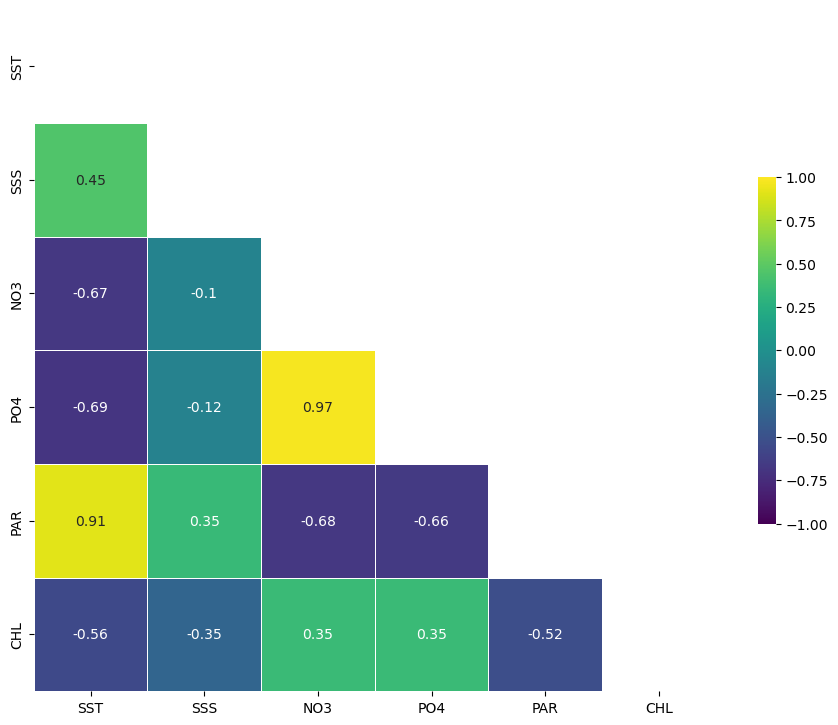

In [18]:
df_ORACLE=pd.DataFrame(columns=['SST','SSS','NO3','PO4','PAR','CHL'])
df_ORACLE['SST']=pd.Series(sst_reshape)
df_ORACLE['SSS']=pd.Series(sss_reshape)
df_ORACLE['NO3']=pd.Series(no3_reshape)
df_ORACLE['PO4']=pd.Series(po4_reshape)
df_ORACLE['PAR']=pd.Series(par_reshape)
df_ORACLE['CHL']=pd.Series(chl_reshape)

# Correlogram
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
mask = np.triu(np.ones_like(df_ORACLE.corr(), dtype=bool))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_ORACLE.corr(), mask=mask,vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,cmap='viridis')
#plt.savefig("/home/alexandra/Documents/correlogram.png")

### Possibility: Add the localization of Tara Oceans sampling stations to the maps

In [19]:
file_stations='coord.csv' # file containing the coordinates (lat, lon) of the stations

stations=pd.read_csv(rep_stations+file_stations)
stations.index=stations['Stations'] # reprocess the dataframe to have stations names as index
stations=stations.drop(columns=['Stations'])
stations


,Latitude,Longitude
Stations,,
Tara_064,-29.5019,37.9889
Tara_068,-31.0266,4.6650
Tara_131,22.7598,-157.9568
Tara_132,31.5213,-158.9958
Tara_093,-34.0614,-73.1066
Tara_151,36.1375,-28.9350
Tara_081,-44.5342,-52.4550
Tara_144,36.4121,-72.9289
Tara_072,-8.7789,-17.9099


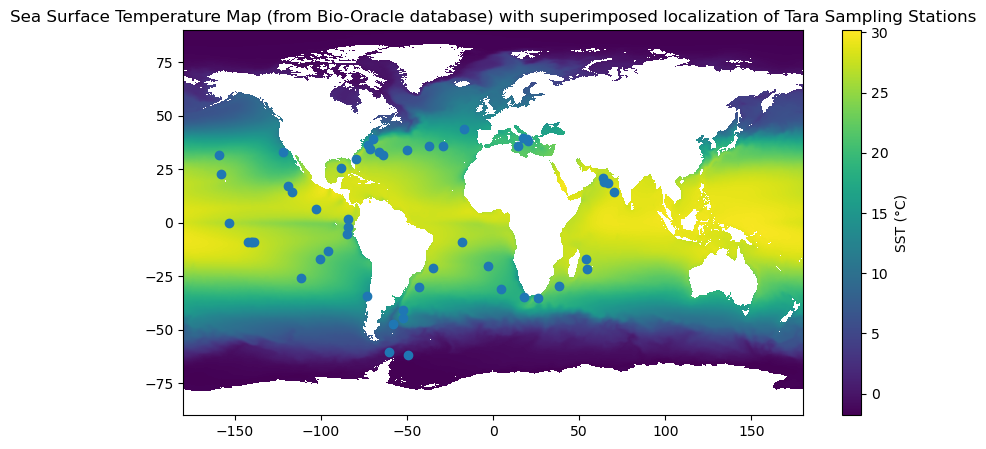

In [20]:
plt.figure(figsize=(10,5))
plt.title("Sea Surface Temperature Map (from Bio-Oracle database) with superimposed localization of Tara Sampling Stations")
plt.pcolormesh(X,Y,SST_masked,cmap='viridis',vmin=np.min(SST_masked),vmax=np.max(SST_masked))
plt.colorbar(label='SST (°C)')
plt.scatter(stations['Longitude'],stations['Latitude'])
#for i in range(len(stations)):
    #plt.annotate(stations.index[i],(stations['Longitude'].iloc[i],stations['Latitude'].iloc[i]))
plt.show()

## 3. Extract ORACLE environmental data at the localization of Tara stations (training data)

In [34]:
# File
file_oracle=pd.read_table(rep+'env_data_oracle.csv',sep=',',index_col='Stations')

In [33]:
# In details
lon_stations=stations['Longitude'] # longitudes of stations
lat_stations=stations['Latitude']

T_Oracle,Sal_Oracle,nitrate_oracle,phosphate_oracle,PAR_oracle,CHL_oracle=[],[],[],[],[],[]

for i in range(len(lon_stations)):
    #print(stations.index[i])
    lon_station=lon_stations.iloc[i] # extract the coordinates of the station ==> lon_station, lat_station
    lat_station=lat_stations.iloc[i]
    lon_index=np.min(np.where(lon>lon_station)[0]) # place on ORACLE grid (<== lon, lat)
    lat_index=np.max(np.where(lat>lat_station)[0])
    #print(lat_index,lon_index)
    T_Oracle.append(SST[lat_index,lon_index])
    Sal_Oracle.append(SSS[lat_index,lon_index])
    nitrate_oracle.append(NO3[lat_index,lon_index])
    phosphate_oracle.append(PO4[lat_index,lon_index])
    PAR_oracle.append(PAR[lat_index,lon_index])
    CHL_oracle.append(chl[lat_index,lon_index])


In [25]:
file_oracle=pd.DataFrame(index=stations.index)
file_oracle['SST']=pd.Series(T_Oracle,index=stations.index)
file_oracle['SSS']=pd.Series(Sal_Oracle,index=stations.index)
file_oracle['NO3']=pd.Series(nitrate_oracle,index=stations.index)
file_oracle['PO4']=pd.Series(phosphate_oracle,index=stations.index)
file_oracle['PAR']=pd.Series(PAR_oracle,index=stations.index)
file_oracle['CHL']=pd.Series(CHL_oracle,index=stations.index)

#file_oracle.to_csv(rep+'env_data_oracle.csv') # Store the dataframe in a csv file
file_oracle

,SST,SSS,NO3,PO4,PAR,CHL
Stations,,,,,,
Tara_064,23.561249,35.423698,0.189375,0.208294,40.271,0.133416
Tara_068,19.155308,35.709622,2.521972,0.384416,39.625,0.169262
Tara_131,24.902052,35.207633,0.000017,0.318973,44.093,0.050909
Tara_132,21.635267,34.872228,0.123623,0.205016,38.773,0.080308
Tara_093,14.801937,34.151880,11.769627,1.211914,38.524,0.728460
Tara_151,20.369091,36.412826,0.021913,0.048784,36.984,0.077472
Tara_081,13.155157,34.608140,10.523554,0.921693,36.984,0.363467
Tara_144,23.817568,36.184789,0.378370,0.027121,31.769,0.427563
Tara_072,26.270136,36.149011,0.000348,0.096330,48.885,0.046560


#### Clustering on environmental variables (using a KMeans algorithm)

In [27]:
names=[]
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(file_oracle)
labels = k_means.labels_
# Labels defined manually for the clusters
for i in range(len(labels)):
    item=labels[i]
    if item==0:
        names.append('Tropical and Subtropical provinces')
    elif item==1:
        names.append('Equatorial provinces, Arabian Sea')
        
    elif item==2:
        names.append('Southern Ocean')
    elif item==3:
        names.append('Coastal/boundary currents')
    else:
        names.append('Temperate provinces, Mediterranean Sea')
#print(names,stations)

#### Do a PCA on environmental data

In [30]:
scaler = StandardScaler()

scaler.fit(file_oracle)
df_transform=scaler.transform(file_oracle)
df_transform
pca = PCA(n_components=5)


components = pca.fit_transform(df_transform)

features = ['SST', 'SSS', 'NO3', 'PO4','PAR','CHL']
#color=province_env
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=7, max_iter=50, random_state=1)
k_means.fit(file_oracle)
labels = k_means.labels_

labels_str= labels.astype(str)

fig = px.scatter(components, x=0, y=1,color=names,labels={'color': "Environmental clusters"},width=1600, height=800,color_discrete_sequence=['red','blue','magenta','mediumseagreen','darkorange'])
    
for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=3,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=7,
    )


fig.update_layout(
    
    xaxis_title="PCA1: 61.3%",
    yaxis_title="PCA2: 20.5%")

fig.update_layout(legend=dict(
    orientation="h",
    itemwidth=70,
    font=dict(size=15),
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()
#fig.write_image("/home/alexandra/Documents/PCA_try.png")
pca.explained_variance_ratio_


array([0.61283864, 0.20536098, 0.10836651, 0.06115667, 0.00863432])

In [31]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig=px.line(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
fig.update_yaxes(tickvals=[0, 0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

fig.show()
fig.write_image("/home/alexandra/Documents/test_oracle_explained_var.png")


## 4.Comparison of Bio-ORACLE environmental data with the in situ measurements made during Tara expedition (taken from Carradec et al, 2018 and Delmont et al, 2022)

In [50]:
file_env=pd.read_table(rep+'env_data_in_situ_Tara.csv',sep=',')
file_env.index=file_env['Stations']
file_env=file_env.drop(columns='Stations')
file_env.head(10)

,SST,SSS,NO3,PO4,CHL
Stations,,,,,
Tara_064,21.969990,35.406612,0.467360,0.153836,0.162993
Tara_068,16.716909,35.658012,0.230036,0.504669,0.545147
Tara_131,26.244699,35.127487,0.018276,0.072184,0.032278
Tara_132,24.686991,35.125111,0.030742,0.057674,0.026898
Tara_093,17.314301,34.205212,5.251773,0.361154,0.203005
Tara_151,17.063200,36.253010,0.630994,0.196512,0.040347
Tara_081,13.442710,34.454090,3.258773,0.526745,0.180899
Tara_144,18.625299,35.850510,1.208439,0.236196,0.194448
Tara_072,24.523500,36.213413,0.212937,0.121103,0.050608


##### Comparison metrics: KS (Kolmogorov Smirnov) test et Pearson correlation

In [67]:
from scipy import stats
predictors=['SST','SSS','NO3','PO4','CHL']
ks=dict(zip(predictors, [None]*len(predictors)))
pearson=dict(zip(predictors, [None]*len(predictors)))
for predictor in predictors:
    ks[predictor]=(stats.kstest(file_oracle[predictor],file_env[predictor]).pvalue)
    # Null hypothesis: both variables follow the same distribution.
    #Confidence threshold of 95%, H0 rejected if p value is <0.05
    pearson[predictor]=(np.corrcoef(file_oracle[predictor],file_env[predictor])[0,1])


### Intermediate steps
(to obtain file hereabove)

#### Data are split between two files (Delmont et al, 2022 Sup Mat and Carradec et al, 2018, Sup Mat)
#### Read in situ data from  Delmont et al

In [35]:
# Delmont -> SST, SSS, NO3, PO4
in_situ_delmont=pd.read_excel(rep_stations+'Tara_delmont.xlsx',skiprows=3)
T=in_situ_delmont['T']
Sal=in_situ_delmont['Sal']
nitrate=in_situ_delmont['NO3']
phosphate=in_situ_delmont['Phos']
name_station=in_situ_delmont['Station']
in_situ_delmont.head(10)


,Unnamed: 0,Station,Latitude,Longitude,T,Sal,Si,NO3,Phos,Fe,SI_NO3,SI_T
0,NaN,100DCM,-13.0023,-95.9759,13.567700,34.822010,12.596078,18.517733,1.934086,0.000953,0.392917,0.093368
1,NaN,100SUR,-13.0023,-95.9759,25.348499,35.752312,2.205244,5.967043,0.711965,0.000018,0.220517,0.330234
2,NaN,102DCM,-5.2529,-85.1545,19.375591,35.092388,9.329958,13.331291,1.464912,0.000616,0.386493,0.108799
3,NaN,102SUR,-5.2529,-85.1545,25.939600,34.946899,4.750910,5.850004,0.681135,0.000073,0.593266,0.568386
4,NaN,106DCM,-0.0283,-84.5862,21.024990,34.977711,14.888898,19.754145,1.620049,0.001180,0.421567,0.397390
5,NaN,106SUR,-0.0283,-84.5862,25.010309,34.701000,6.379584,6.566505,0.673256,0.000266,0.477280,0.271732
6,NaN,109DCM,1.9928,-84.5766,24.618990,34.437401,6.785172,8.487382,0.883214,0.000372,0.371488,0.387985
7,NaN,109SUR,1.9928,-84.5766,26.621590,33.890488,4.649109,3.226652,0.502461,0.000110,0.299211,0.181944
8,NaN,10DCM,40.6541,2.8407,13.321891,38.246189,2.360223,2.821610,0.201942,0.001089,0.105167,0.044828
9,NaN,10SUR,40.6541,2.8407,24.680099,37.941910,0.362054,0.096598,0.155761,0.001706,0.161934,0.919158


In [36]:
# Carradec et al --> chlorophyll (and extract information on Biogeochemical province)
in_situ_carradec=pd.read_excel(rep_stations+'Tara_env.xlsx')
prod=in_situ_carradec['NPP']
chloro=in_situ_carradec['Chlorophyll (µmol/L)']
station_label=in_situ_carradec['Sample material label (TARA_station#_depth_size-fraction)']
distance=in_situ_carradec['Distance to coast (km)']
lat_bio=in_situ_carradec['Latitude (degree N)']
lon_bio=in_situ_carradec['Longitude (degree E)']
province=in_situ_carradec['Biogeographical province (Longhurst 2007) terms registered at www.marineregions.org']
ocean=in_situ_carradec.iloc[:,5]
in_situ_carradec

,Sample label (Tara Oceans ID),Station label (TARA_station#),Method label (protocol-label_size-fraction),Sample material label (TARA_station#_depth_size-fraction),Marine biome (Longhurst 2007) terms registered at www.marineregions.org,Ocean and sea region,Biogeographical province (Longhurst 2007) terms registered at www.marineregions.org,"Depth Label terms registered at EnvO, the Environmental Ontology (http://environmentontology.org/)",Date/Time (yyyy-mm-ddThh:mm),Latitude (degree N),...,Phosphates (µmol/L),Distance to coast (km),NPP,NO2NO3 (mmol/m3),Iron (µmol/m3),NH4 (mmol/m3),Additional environmental context about depth specific features (url),Additional environmental context about mesoscale features (url),Additional environmental context about water column features (url),Additional methodological context (url)
0,TARA_N000001578,TARA_098,SEQ-(500mL-or-15min)_W5-20,TARA_098_SRF_5-20,Trades Biome,[SPO] South Pacific Ocean,[SPSG] South Pacific Subtropical Gyre Province...,[SRF] surface water layer (ENVO:00010504),2011-04-03T13:44,-25.8051,...,0.200,271.907075,63.5567,0.050,0.228104,0.012967,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
1,TARA_N000001604,TARA_100,SEQ-(100L-or-15min)_W>0.8,TARA_100_SRF_0.8->,Trades Biome,[SPO] South Pacific Ocean,[SPSG] South Pacific Subtropical Gyre Province...,[SRF] surface water layer (ENVO:00010504),2011-04-15T12:45,-13.0023,...,0.680,1408.200571,398.5590,6.200,0.003370,0.212118,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
2,TARA_N000001608,TARA_100,SEQ-(100L-or-15min)_W0.8-5,TARA_100_SRF_0.8-5,Trades Biome,[SPO] South Pacific Ocean,[SPSG] South Pacific Subtropical Gyre Province...,[SRF] surface water layer (ENVO:00010504),2011-04-15T12:45,-13.0023,...,0.680,1408.200571,398.5590,6.200,0.003370,0.212118,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
3,TARA_N000002293,TARA_128,SEQ-(500mL-or-15min)_N5-20,TARA_128_SRF_5-20,Trades Biome,[NPO] North Pacific Ocean,[PEOD] Pacific Equatorial Divergence Province ...,[SRF] surface water layer (ENVO:00010504),2011-09-05T16:38,0.0078,...,0.540,446.408500,430.8805,5.080,0.003980,0.259625,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
4,TARA_N000001590,TARA_098,SEQ-(100L-or-15min)_W0.8-3,TARA_098_MES_0.8-3,Trades Biome,[SPO] South Pacific Ocean,[SPSG] South Pacific Subtropical Gyre Province...,[MES] marine water layer (ENVO:01000295) withi...,2011-04-04T13:55:02,-25.8076,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,TARA_N000000709,TARA_068,SEQ-(500mL-or-15min)_N180-2000,TARA_068_SRF_180-2000,Trades Biome,[SAO] South Atlantic Ocean,[SATL] South Atlantic Gyral Province (MRGID:21...,[SRF] surface water layer (ENVO:00010504),2010-09-13T20:20,-31.0507,...,0.229,1113.163688,498.0465,1.303,0.374145,0.013196,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...,https://ws.pangaea.de/dds-fdp/rest/panquery?da...
472,TARA_A100000536,TARA_022,SEQ-(500mL-or-15min)_N180-2000,TARA_022_SRF_180-2000,Westerlies Biome,[MS] Mediterranean Sea,"[MEDI] Mediterranean Sea, Black Sea Province (...",[SRF] surface w

#### Extract the stations of interest from in situ data

In [38]:
# Delmont -> SST, SSS, NO3, PO4
# DataFrame = in_situ_delmont
list_stations_delmont=[]
T_mod,Sal_mod,nitrate_mod,phosphate_mod=[],[],[],[]
for i in range(len(name_station)):
    station=name_station.iloc[i]
    if len(station)==5:
        newname='Tara_0'+station[:-3]
    else:
        newname='Tara_'+station[:-3]
    if newname in np.array(stations.index) and station[-3:]=='SUR':
        print(newname)
        T_mod.append(T.iloc[i])
        Sal_mod.append(Sal.iloc[i])
        nitrate_mod.append(nitrate[i])
        phosphate_mod.append(phosphate[i])
        list_stations_delmont.append(newname)

Tara_100
Tara_102
Tara_109
Tara_110
Tara_111
Tara_122
Tara_123
Tara_124
Tara_125
Tara_128
Tara_131
Tara_132
Tara_135
Tara_136
Tara_137
Tara_138
Tara_142
Tara_143
Tara_144
Tara_145
Tara_146
Tara_147
Tara_148
Tara_149
Tara_150
Tara_151
Tara_152
Tara_018
Tara_022
Tara_025
Tara_026
Tara_036
Tara_038
Tara_039
Tara_041
Tara_051
Tara_052
Tara_064
Tara_065
Tara_066
Tara_068
Tara_070
Tara_072
Tara_076
Tara_078
Tara_080
Tara_081
Tara_082
Tara_084
Tara_085
Tara_093
Tara_098


#### Need to re-order the stations in the in situ measurements, to have them in the same order as ORACLE

In [39]:
T_env,Sal_env,nitrate_env,phosphate_env,chl_env,pp_env=[],[],[],[],[],[]
for station in stations.index:
    print(station)
    ind=np.where(np.array(list_stations_delmont)==station)[0][0]
    T_env.append(T_mod[ind])
    Sal_env.append(Sal_mod[ind])
    nitrate_env.append(nitrate_mod[ind])
    phosphate_env.append(phosphate_mod[ind])

Tara_064
Tara_068
Tara_131
Tara_132
Tara_093
Tara_151
Tara_081
Tara_144
Tara_072
Tara_076
Tara_142
Tara_125
Tara_080
Tara_078
Tara_145
Tara_135
Tara_085
Tara_025
Tara_110
Tara_138
Tara_109
Tara_026
Tara_018
Tara_150
Tara_102
Tara_084
Tara_036
Tara_082
Tara_124
Tara_149
Tara_052
Tara_041
Tara_143
Tara_022
Tara_051
Tara_136
Tara_152
Tara_098
Tara_146
Tara_147
Tara_122
Tara_038
Tara_123
Tara_039
Tara_070
Tara_137
Tara_111
Tara_065
Tara_100
Tara_148
Tara_066
Tara_128


#### Same procedure for Carradec et al (chlorophyll)


In [52]:
# Data_frame : in_situ_carradec
liste_distance=[]
liste_province=[]
liste_ocean=[]
chl_mod=[]
liste_lon_car,liste_lat_car=[],[]

list_stations=[]
for i in range(len(station_label)):
    item2=station_label.iloc[i]
    #print(item2)
    newname='Tara_'+item2[5:8]
    #print(newname)
    #print(item2[9:12])
    #print(newname in list_stations)
    #print(newname in np.array(stations.index) and item2[9:12]=='SRF' and newname not in list_stations)
    if newname in np.array(stations.index) and item2[9:12]=='SRF' and newname not in list_stations:
        if np.isnan(distance.iloc[i]):
            liste_distance.append(0)
                
        else:
            liste_distance.append(distance.iloc[i])
        liste_province.append(province.iloc[i][:-14])
        liste_ocean.append(ocean.iloc[i][5:])
        chl_mod.append(chloro.iloc[i])
        liste_lat_car.append(lat_bio.iloc[i])
        liste_lon_car.append(lon_bio.iloc[i])
        print(newname)
        list_stations.append(newname)


Tara_098
Tara_100
Tara_128
Tara_093
Tara_135
Tara_137
Tara_150
Tara_082
Tara_070
Tara_110
Tara_151
Tara_084
Tara_145
Tara_152
Tara_081
Tara_148
Tara_085
Tara_064
Tara_068
Tara_072
Tara_041
Tara_132
Tara_051
Tara_065
Tara_142
Tara_038
Tara_111
Tara_122
Tara_078
Tara_076
Tara_052
Tara_123
Tara_146
Tara_125
Tara_080
Tara_138
Tara_109
Tara_136
Tara_039
Tara_143
Tara_131
Tara_124
Tara_026
Tara_018
Tara_149
Tara_022
Tara_147
Tara_036
Tara_025
Tara_066
Tara_102
Tara_144


In [53]:
# Reorganize chlorophyll data in the right order
chl_env,province_env=[],[]
for station in stations.index:
    #print(station)
    ind=np.where(np.array(list_stations)==station)[0][0]
    #print(ind)
    chl_env.append(chl_mod[ind])
    province_env.append(liste_province[ind])


In [46]:
file_env=pd.DataFrame(index=stations.index)
file_env['SST']=pd.Series(T_env,index=stations.index)
file_env['SSS']=pd.Series(Sal_env,index=stations.index)
file_env['NO3']=pd.Series(nitrate_env,index=stations.index)
file_env['PO4']=pd.Series(phosphate_env,index=stations.index)
file_env['CHL']=pd.Series(chl_env,index=stations.index)
file_env
#file_env.to_csv(rep+'env_data_in_situ_Tara.csv')